Greetings to Kagglers from all around the world! I have conducted a small Descriptive Analysis on the HR Data set--which consists of the the details of employees of a XYZ company. Although my analysis is not yet complete, I would like to share whatever I have done so far and will ensure its completion in the near future.

As I am a beginner in this field, please mention any kind of suggestions in the comments and Upvoting my work will really inspire me to create even more beautiful visualisations.

So, let's get started.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data =
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]],
        x=[-9, -6, -5 , -3, -1], # horizontal axis
        y=[0, 1, 4, 5, 7] # vertical axis
    ))
#x axis
fig.update_xaxes(visible=False)

#y axis    
fig.update_yaxes(visible=False)
fig.show()

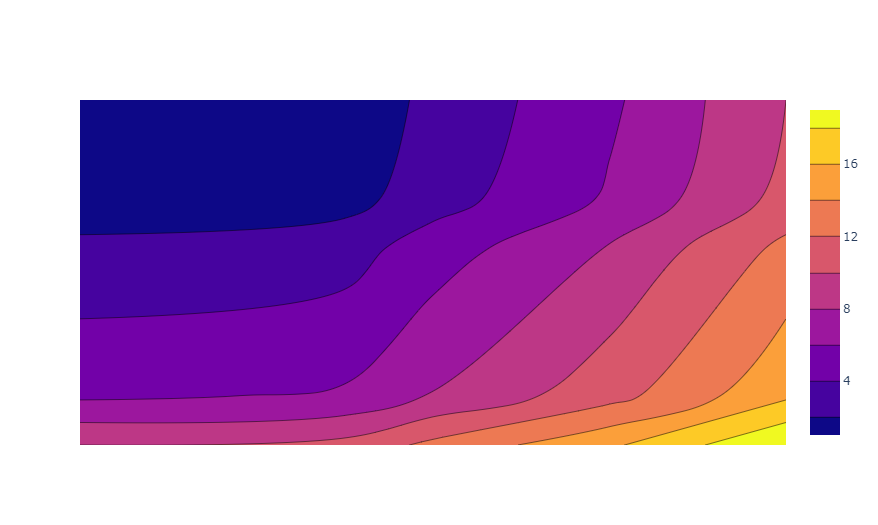

# Importing Reqd Libraries to get started.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install pywaffle
from pywaffle import Waffle

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px

import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset.

In [ ]:
df=pd.read_csv("../input/human-resources-data-set/HRDataset_v14.csv")
df.head().style.set_caption("District Dataframe").set_properties(**{'background-color': 'black',
                           'color': 'lawngreen','border': '1.5px  solid white'})

# Basic EDA:

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe().T #Prints Statistical Data of numerical values

### Looks like ManagerID seems to have missing values.(Possible Reason:As you will see further down, there are some Employees with higher posts, who don't require Manager supervision.)

# Isolating numerical columns and categorical columns:

In [ ]:
ccol=df.select_dtypes(include=["object"]).columns
ncol=df.select_dtypes(include=["int","float"]).columns

In [ ]:
print("The number of Categorical columns are:",len(ccol))
print("The number of Numerical columns are:",len(ncol))

In [ ]:
ncol

In [ ]:
for i in ncol:
    print(i,"-",df[i].nunique())
    
#DaysLateLast30----How many days the employee arrived late to work in the last 30 days

In [ ]:
ccol

In [ ]:
for i in ccol:
    print(i,"-",df[i].nunique())

In [ ]:
ncol

# What are the visualisations I have tried/checked (Some of them are in the form of Hypothesis) :

1. Count of employees in each position. (Allows to check vacancies and stuff)
2. Count of employees in every state.
3. Female-Male Gender Ratio within the company.
4. Employee count under each manager.
5. Dept wise count of employees.
6. Age Distribution of employees.
7. Probability Distribution of Pay-Rate among various employees.
8. Pay Rate wrt Manager working under.
9. Performance Score Manager-wise to check which manager is leading a better team.
10. Date of termination having any connection with manager?
11. Employees leaving from a particular dept?
12. Employees joining the company per year. 

## 1. Count of employees in each position. (Allows to check vacancies and stuff)

In [ ]:
df["Position"]

In [ ]:
t=(df.groupby("Position")["EmpID"].count()).sort_values(ascending =True)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=t.index,y=t.values)
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',
                   bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    
plt.xticks(rotation=90) #Rotating the Label
plt.title("Count of employees in each position",size=25,weight="bold") #Title of the plot
plt.xlabel("Position",fontsize=20) #Title of x-axis
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()


#### Looks like the company weighs more preference to "Production Technician" background while hiring employees.

## 2. Count of employees in every state.

In [ ]:
z=df.groupby("State")["EmpID"].count()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=z.index,y=z.values)
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90) #Rotating the Label
plt.title("Count of employees in every State",size=25,weight="bold") #Title of the plot
plt.xlabel("State",fontsize=20) #Title of x-axis
plt.ylabel("Employee Count",fontsize=20)
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()


#### Looks like **MASSACHUSETTS** has a higher employee number. Might suggest that the company's based on this state.

In [ ]:
y=df[["EmpID","Department","State"]].groupby(["State","Department"])["EmpID"].count()

In [ ]:
table = pd.pivot_table(df, values='EmpID', index=['State', 'Department'],aggfunc=lambda x: len(x.unique()))
table.rename({"EmpID":"Count of Employees"},axis=1,inplace=True)
table

#### As seen from the above table, the only state which handles Production is Massachusetts. Rest all other states don't have any production unit. So if you are hired as a Production Technician, you will be heading to Massachusetts for your work.

Distribution within Massachusetts:

In [ ]:
table.reset_index(drop=False,inplace=True)

In [ ]:
t=table[table["State"]=="MA"].reset_index()
t.sort_values(by=["Count of Employees"],ascending=False,inplace=True)
t["Department"]=t["Department"].apply(lambda x:x.strip())

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=t["Count of Employees"],y=t["Department"])
for p in plots.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center',
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))

plt.yticks(rotation=0) #Rotating the Label
plt.title("Massachusetts Department Distribution",size=25,weight="bold") #Title of the plot
plt.xlabel("Employee Count",fontsize=20) #Title of x-axis
plt.ylabel("Department",fontsize=20)
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()

## 3. Female-Male Gender Ratio within the company.

In [ ]:
x=df.groupby("Sex")["EmpID"].count()/df["EmpID"].count()
x

In [ ]:
plt.figure(figsize=(8,8))
# Create a Donut Chart
plt.pie(x,labels=x.index,wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },autopct='%2.1f%%',shadow=True)
plt.rc("font",size=13)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Female vs Male Distribution",size=20,loc="center")

plt.tight_layout()

#### There are more Female employees than Males.(56.6% to 43.4%)

## 4. Employee count under each manager.

In [ ]:
k=df.groupby("ManagerID")["EmpID"].count()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
plots=sns.barplot(x=k.index,y=k.values,estimator=sum)
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',
                   bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
#plt.xticks(rotation=0) #Rotating the Label
plt.title("Manager Wise Split of Employees",size=25,weight="bold") #Title of the plot
plt.xlabel("Manager ID",fontsize=20) #Title of x-axis
plt.ylabel("Employee Count",fontsize=20)
plt.tick_params(labelsize=14) #Varying label size
plt.tight_layout()


#### Looks like Managers with IDs 3,9,15,30 have a less number of employees working under them.

## 5. Department wise count of employees.

In [ ]:
j=df.groupby("Department")["EmpID"].count().reset_index(drop=False)

In [ ]:
plt.figure(figsize=(10,10))
squarify.plot(sizes=j['EmpID'], label=j['Department'],color=["grey","green","blue", "red","yellow","orange","indigo"], alpha=.5)
plt.rc('font', size=8)          
plt.axis('off')
plt.show()

#### Majority of Employees belong to the Production Wing of the company.

## 6. Age Distribution of employees.

In [ ]:
df["DOB"]

In [ ]:
import datetime
from datetime import date,datetime
from dateutil.relativedelta import relativedelta

In [ ]:
w=date.today()
w=w.strftime("%Y-%m-%d")

In [ ]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs(relativedelta(d2, d1).years)

In [ ]:
d=pd.to_datetime(df["DOB"]).apply(lambda x:x.strftime("%Y-%m-%d"))
df["Age"]=d.apply(lambda x:days_between(x, w))
df["Age"]

In [ ]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
plt.grid(True)
ax=sns.kdeplot(df["Age"],shade=True,color="red")
ax.grid(which='major', axis='x', zorder=0, color='#DFFF00', linewidth=0.4)
ax.grid(which='major', axis='y', zorder=0, color='#DFFF00', linewidth=0.4)
plt.rc('font', size=10,weight="bold")
plt.xticks(rotation=20)
plt.tight_layout()

#### Majority of the employees seems to be middle aged, with 35 being the mode(Higher probabilty of finding) 

## 7. Probability Distribution of Pay-Rate among various employees.

(i) Salary distribution based on Gender

In [ ]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.kdeplot(df.loc[(df["Sex"]=="F"),"Salary"],shade=True,color="red",label="Female",alpha=0.1)
sns.kdeplot(df.loc[(df["Sex"]=="M "),"Salary"],shade=True,color="yellow",label="Male",alpha=0.1) #shade=True
plt.legend()

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(y=df["Salary"], x=df["Sex"])

In [ ]:
df.loc[(df["Salary"]==df["Salary"].max()),:]

#### A women with the name Janet King is paid the highest salary in the company.

#### The plot shows that women are given high paid jobs as compared to men.

## 8. Pay Rate wrt Manager working under.

In [ ]:
p=df[["EmpID","ManagerID","Salary"]].copy().dropna()
p.head()

In [ ]:
#Need to check whether employees with high pay belong to a certain class of managers
p=(p.groupby("ManagerID").agg({"EmpID":"count","Salary":"mean"})).sort_values(by="Salary")
p.rename({"EmpID":"Count of Employees"},axis=1,inplace=True)
p

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.scatterplot(p.index, p.Salary,s=200,edgecolor="yellow")  #c=p.index, cmap='viridis',edgecolor="yellow", linewidth=1
 
# Add titles (main and on axis)
plt.xlabel("Manager ID")
plt.ylabel("MEAN Salary")
plt.title("Manager ID vs Mean Salary")

# Show the graph
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = p['Count of Employees']
y = p['Salary']
z = p.index

ax.set_xlabel("Count of Employees")
ax.set_ylabel("Mean Salary")
ax.set_zlabel("Manager ID")

ax.scatter(x, y, z,c="yellow")

plt.show()

#### Highest paid employee is working under Manager with ID=9

## 9. Performance Score Manager-wise to check which manager is leading a better team.

### a. Manager-Wise Split: 

In [ ]:
df["PerformanceScore"] # PIP means Performance Improvement Plans-----meaning they are poorly performing.

In [ ]:
df["PerformanceScore"].unique()

#### A performance improvement plan is also referred to as a **PIP** and an alternative name is a performance action plan. PIP is an HR leverage tool that outlines specific steps for the employee to take to improve and goals for them to work towards.

#### I have assumed that the highest rating is 4 and the lowest rating is 1.

'Exceeds'------------------4

'Fully Meets'--------------3

'Needs Improvement'--------2

'PIP'----------------------1(Very Poor)


In [ ]:
dic=dict(zip(df["PerformanceScore"].unique(),[4,3,2,1]))
df["PS"]=df["PerformanceScore"].apply(lambda x:dic[x])

In [ ]:
c=df[["EmpID","ManagerID","PS"]].copy()
c.dropna(inplace=True)
c.head()

In [ ]:
d=c.groupby(["ManagerID","PS"])["EmpID"].count()
d=pd.DataFrame(d)
d #Gives an account of the count of employees having certain performance scores under various managers. 

In [ ]:
ori=d.reset_index()
good=ori[ori["PS"]>=3]
bad=ori[ori["PS"]<3]

good.shape,bad.shape

In [ ]:
g=pd.DataFrame(good.groupby("ManagerID")["EmpID"].sum()).reset_index()
b=pd.DataFrame(bad.groupby("ManagerID")["EmpID"].sum()).reset_index()

g=g.rename(columns={"EmpID":"Count of Employees"})
b=b.rename(columns={"EmpID":"Count of Employees"})

In [ ]:
b

In [ ]:
# Reorder the dataframe
b = b.sort_values(by=["Count of Employees"])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = b['Count of Employees'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * b["Count of Employees"] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(b.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(b.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, b["ManagerID"].astype("int")):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

ax.set_title("Count of UNDER-Performing Employees Manager-Wise",pad=50)

In [ ]:
# Reorder the dataframe
g = g.sort_values(by=["Count of Employees"])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = g['Count of Employees'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * g["Count of Employees"] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(g.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(g.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=np.power(heights,2), 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#ff0000",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, np.power(heights,2), g["ManagerID"].astype("int")):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

ax.set_title("Count of OVER-Performing Employees Manager-Wise",pad=50)

#### Conclusion:

Manager with ID=18 has the best lot of employees, because there are less employees underperforming and more employees overperforming.

### b. Gender Wise Split:

In [ ]:
h=pd.DataFrame(df.groupby(["Sex","PS"])["EmpID"].count()).reset_index()
h

In [ ]:
fig=px.bar(h, x='PS', y='EmpID', color='Sex', title='Performance Score Gender-Wise',text="EmpID",
      labels={'PS': 'Performance Score', 'EmpID': 'Count of Employees'},
      barmode="group")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=10)
fig

#### Again has been proven that Women are more efficient compared to Men.

## 10. Date of termination having any connection with manager?

In [ ]:
df["DateofHire"]

In [ ]:
df["DateofTermination"]

In [ ]:
df["TermReason"] #Describes the reason for leaving the job

In [ ]:
v=df[["EmpID","DateofHire","DateofTermination","TermReason"]].copy()
v.dropna(inplace=True) #Removing those employees who are still working in the company
v.head()

In [ ]:
v.shape  #Looks like 311-104=207 employees have been retained by the company

In [ ]:
v.TermReason.nunique(),v.TermReason.unique() #One of the employees' was a Gangster lol.

In [ ]:
v1=pd.DataFrame(v.groupby("TermReason")["EmpID"].count()).reset_index()
v1

In [ ]:
plt.figure(figsize=(20,20))
sns.set_theme()
sns.scatterplot(data=v1.sort_values(by=["EmpID"]), x="TermReason", y="EmpID", size="EmpID",color="blue", legend=False, sizes=(2000, 10000), alpha=0.8, linewidth=6)
plt.xlabel("Various Reasons",size=25)
plt.ylabel("Number of Employees",size=25)
plt.title("To determine why the majority of employees are leaving the company", loc="center")
plt.yticks(fontsize=20) 
plt.xticks(fontsize=15,rotation=60) 
# show the graph
plt.tight_layout()

#### The top three reasons for the Employees to leave the company were:

1. A better position in another company leading to career upgrowth.(~20%)

2. Lack of Job Satisfaction(unhappiness)

3. A better salary offered by rival companies.

## 11. Employees leaving from a particular dept?

In [ ]:
w=df[["EmpID","DateofHire","DateofTermination","Department"]].copy()
w.dropna(inplace=True) #Removing those employees who are still working in the company
w.head()

In [ ]:
w1=pd.DataFrame(w.groupby("Department")["EmpID"].count()).reset_index()
w1

In [ ]:
# Reorder it based on the values
ordered_df = w1.sort_values(by='EmpID')
my_range=range(1,len(w1.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['EmpID'], color='skyblue')
plt.plot(ordered_df['EmpID'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Department'])
plt.title("Department Distribution of Turn-Over Rate", loc='center')
plt.xlabel('No of Employees',size=20)
plt.ylabel('Department',size=20)

# Show the plot
plt.show()

#### Looks Like the Production Dept has lost a chunk of employees ever since the beginning.

## 12. Employees joining the company per year. 

In [ ]:
n=df[["EmpID","DateofHire","Sex"]].copy()
n["DateofHire"]=pd.to_datetime(n["DateofHire"])
n["Group"]=n["DateofHire"].apply(lambda x:int(x.year))

In [ ]:
n=pd.DataFrame(n.groupby("Group")["EmpID"].count())
n

In [ ]:
fig = px.bar(n, x=n.index, y='EmpID',color='EmpID',
             labels={'EmpID':'Count of Employees',"Group":"Year of Hiring"}, height=400)
fig.update_layout(
    font_family="Stencil",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial",
                 title_font_color="Green")
fig.update_yaxes(title_font_family="Arial",
                 title_font_color="Green")
fig.update_layout(
    title={
        'text': "Bar Chart",
        'y':0.9,
        'x':0.42,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

#### The year 2011 was the Golden Year, with most of the recruitment taking place.(83 Employees employed)

In [ ]:
n=n.reset_index()

In [ ]:
n_categories = n.shape[0]
#colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]
colors = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': n["EmpID"],
            'labels': ["{0} ({1})".format(df[0], df[1]) for df in n[['Group', 'EmpID']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Year-Wise Distribution', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

Through this Waffle visual, I have tried to show that year 2011 has the most number of recruitments.

#### Looking for some correlations among the numerical columns:

In [ ]:
corr_m=df.drop([i for i in ncol if "ID" in i],axis=1).corr()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_m,annot=True,linewidths=.5,cmap="CMRmap")

Looks like there is only one Significant correlation which we can check, i.e. the one between Salary and SpecialProjectsCount.

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.scatterplot(x=df["SpecialProjectsCount"],y=df["Salary"],hue=df["Sex"])
plt.ylim([0,2.6e5])
plt.xlabel("Special Projects Count",size=20)
plt.ylabel("Salary",size=20)

### Well there's not much of a trend that I can observe. Please let me know if you find any useful insights in the comments below. 

# Don't forget to leave your comments and feedbacks on how I can improve my visualizations. Upvoting will motivate me in my future endeavours.

**Future Analysis kept in mind**:

Recruitment Source :Relationships between Recruiting Sources and Employee Performance, Absenteeism,Employee Satisfaction

Late last 30 days to categorise Sincere employees

Performance Score vs Salary

In [ ]:
#df["EmpSatisfaction"].value_counts()

In [ ]:
#df["RecruitmentSource"].value_counts() #vs Performance Score

## THANK YOU!